# Training Linear Models

## Linear Regression

In [1]:
import numpy as np

SEED = 42

np.random.seed(SEED)
m = 100

X = 2 * np.random.rand(m, 1)

y = 4 + 3 * X + np.random.rand(m, 1)

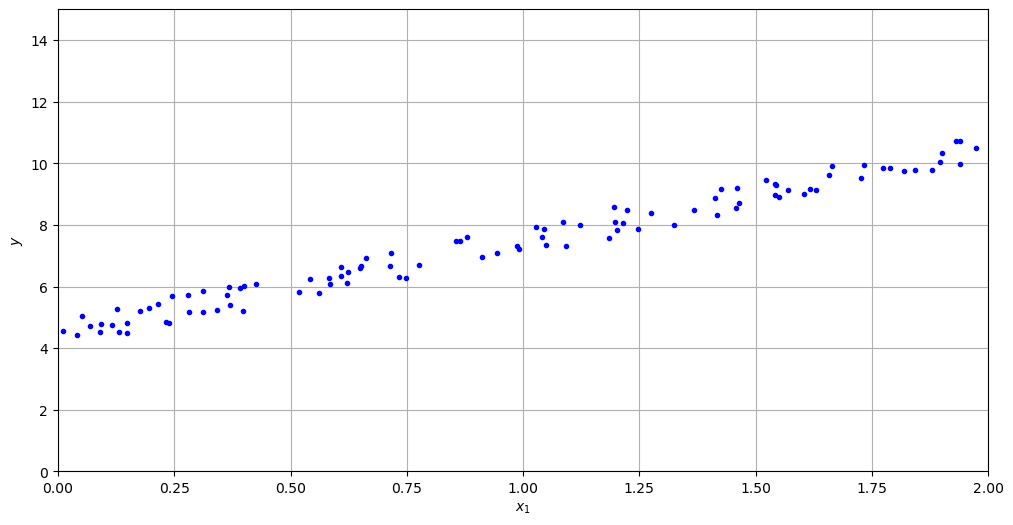

In [2]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([0, 2, 0, 15])
plt.grid()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

theta_best

array([[4.51359766],
       [2.98323418]])

In [4]:
X_new = np.array([[0], [2]])

X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best

y_predict

array([[ 4.51359766],
       [10.48006601]])

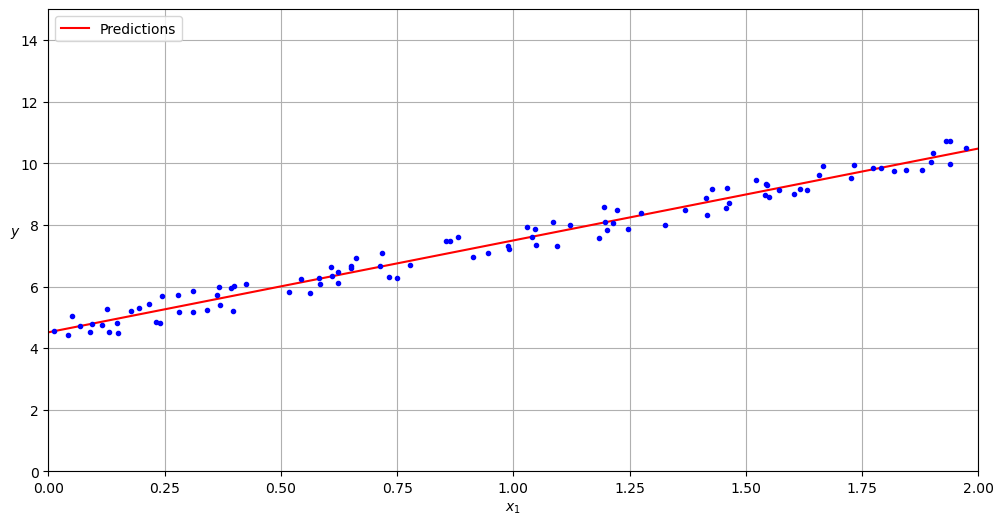

In [5]:
plt.figure(figsize=(12, 6))

plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

plt.axis([0, 2, 0, 15])

plt.grid()

plt.legend(loc='upper left')

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [9]:
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

## Gradient Descent

## Ploynomial Regression

## Learning Curves

## Regularized Linear Models

## Logistic Regression